In [1]:
library(SoupX)
library(ggplot2)
library(cowplot)
library(SingleR)
library(celldex)
library(Seurat)
library(SummarizedExperiment)
library(scran)
library(patchwork)
library(EnhancedVolcano)
library(clusterProfiler)
library(org.Mm.eg.db)
library(AnnotationHub)
library(dplyr)
library(enrichplot)
library(SingleCellExperiment)
library("reshape2")
library(viridis)
library(harmony)
#############################################
# COMMENTS
#############################################
# Needs to fix... 
# directory paths
# parameters for statistics

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

ERROR: Error in library(EnhancedVolcano): there is no package called ‘EnhancedVolcano’


2967 genes passed tf-idf cut-off and 1087 soup quantile filter.  Taking the top 100.

Using 472 independent estimates of rho.

Estimated global rho of 0.03

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Expanding counts from 13 clusters to 8677 cells.

5117 genes passed tf-idf cut-off and 1720 soup quantile filter.  Taking the top 100.

Using 684 independent estimates of rho.

Estimated global rho of 0.04



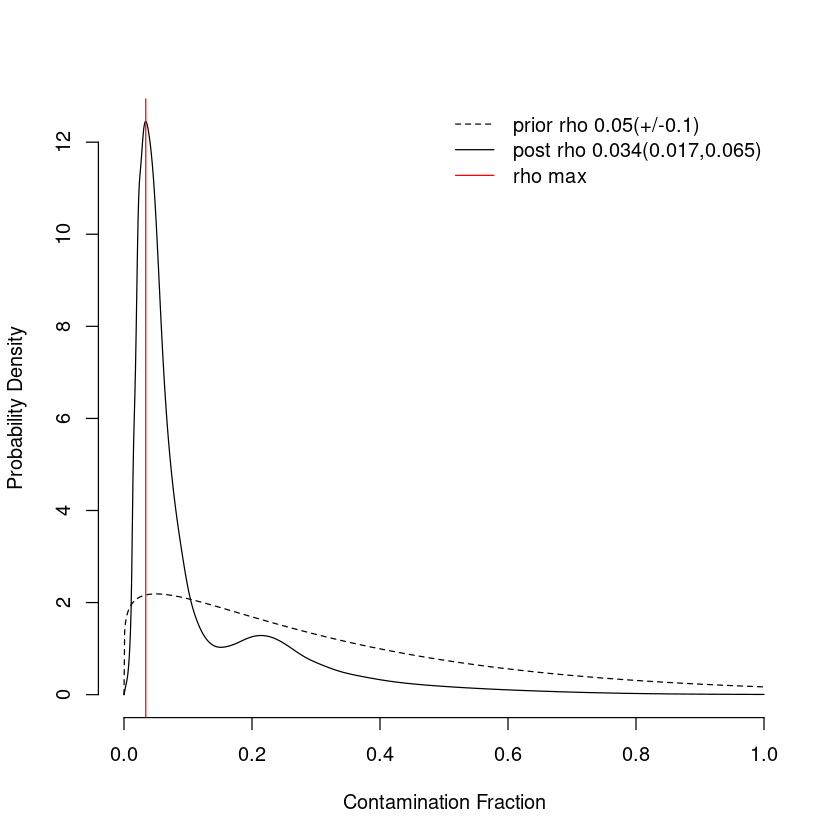

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Expanding counts from 16 clusters to 10377 cells.



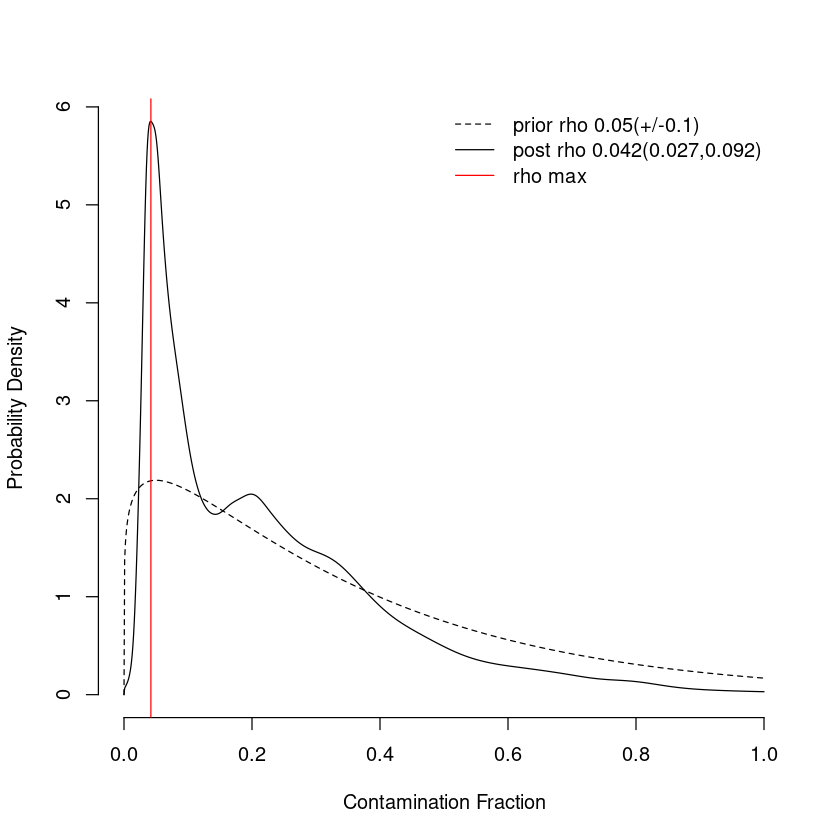

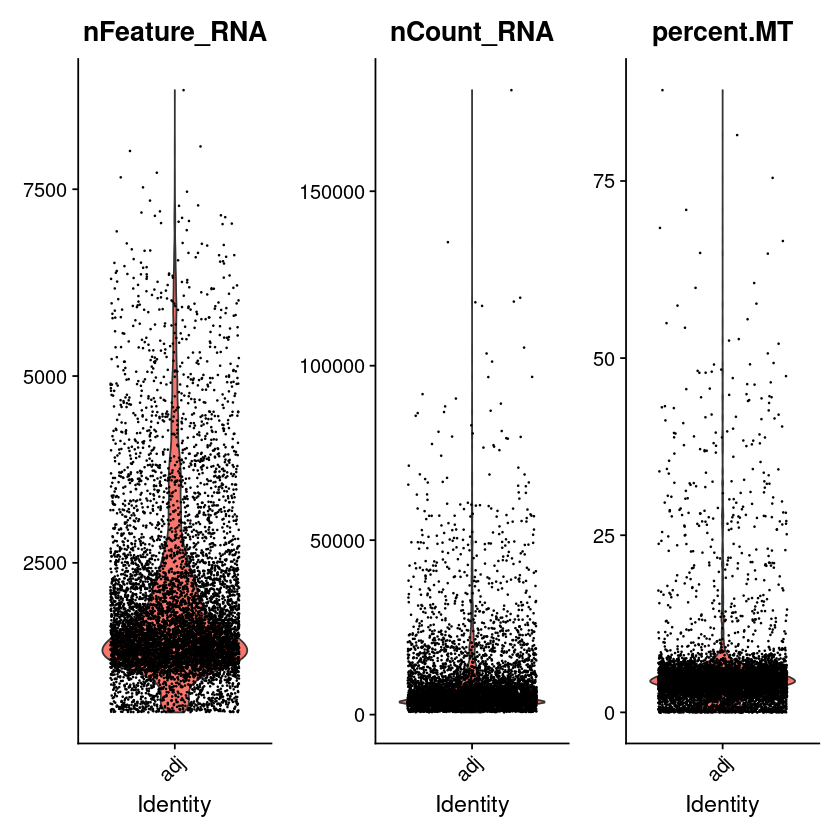

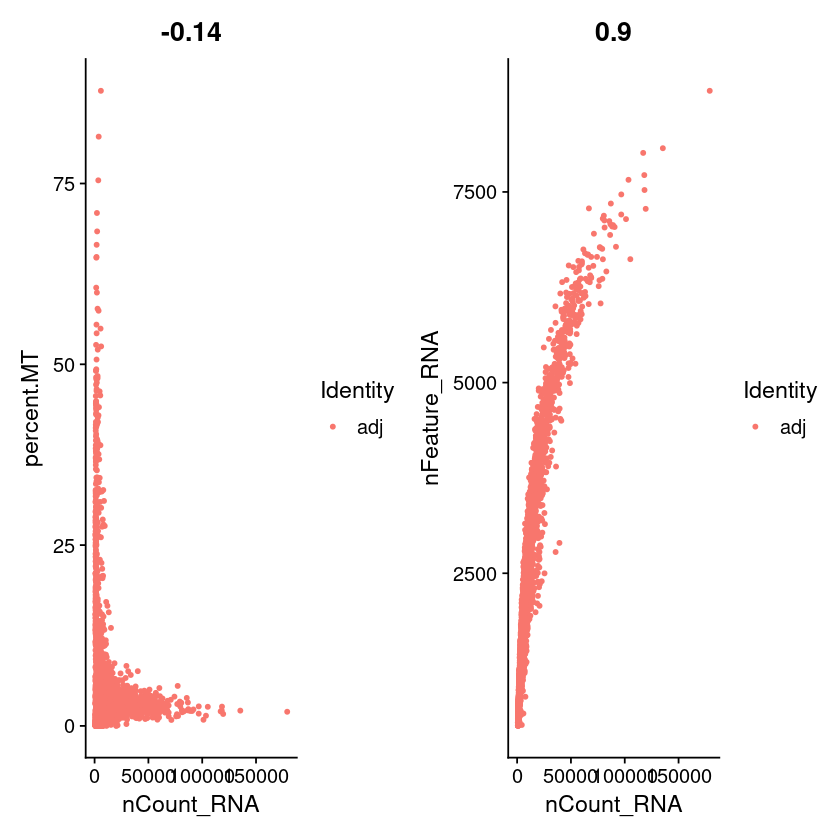

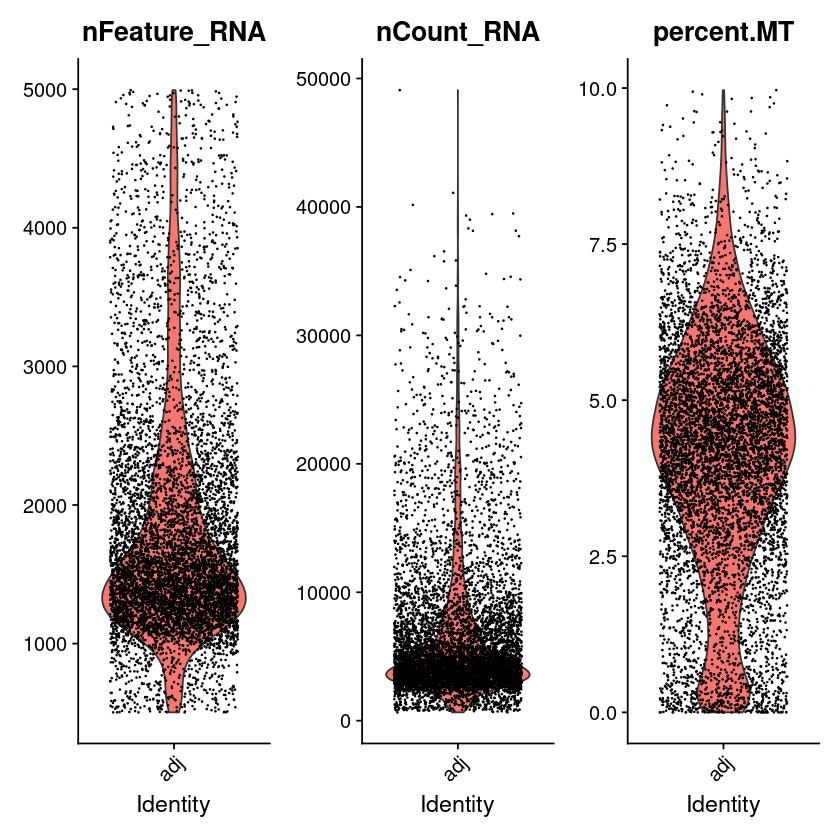

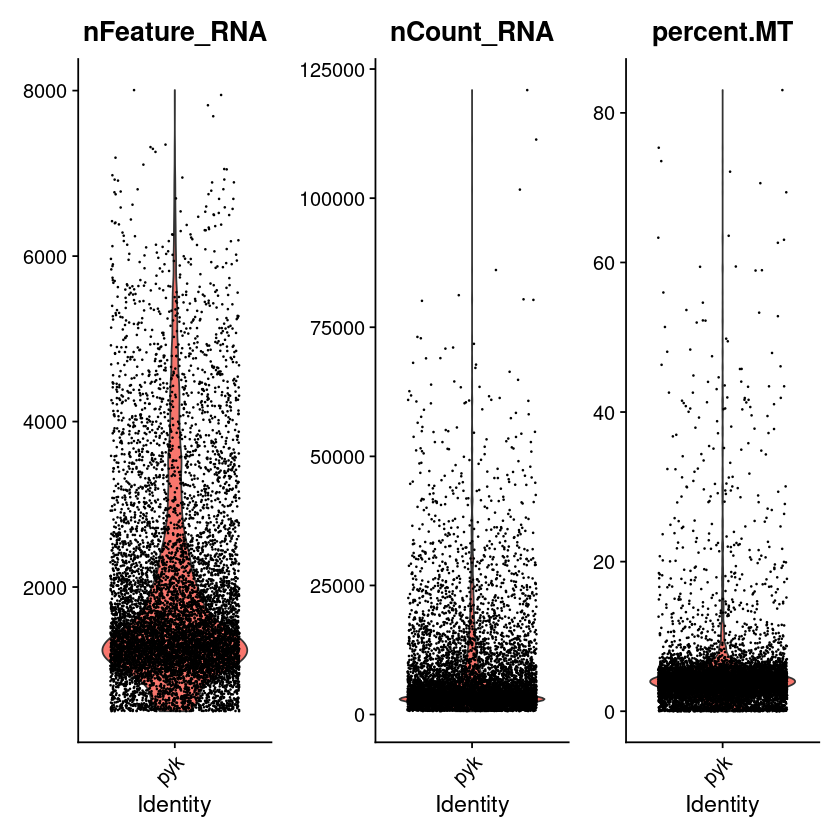

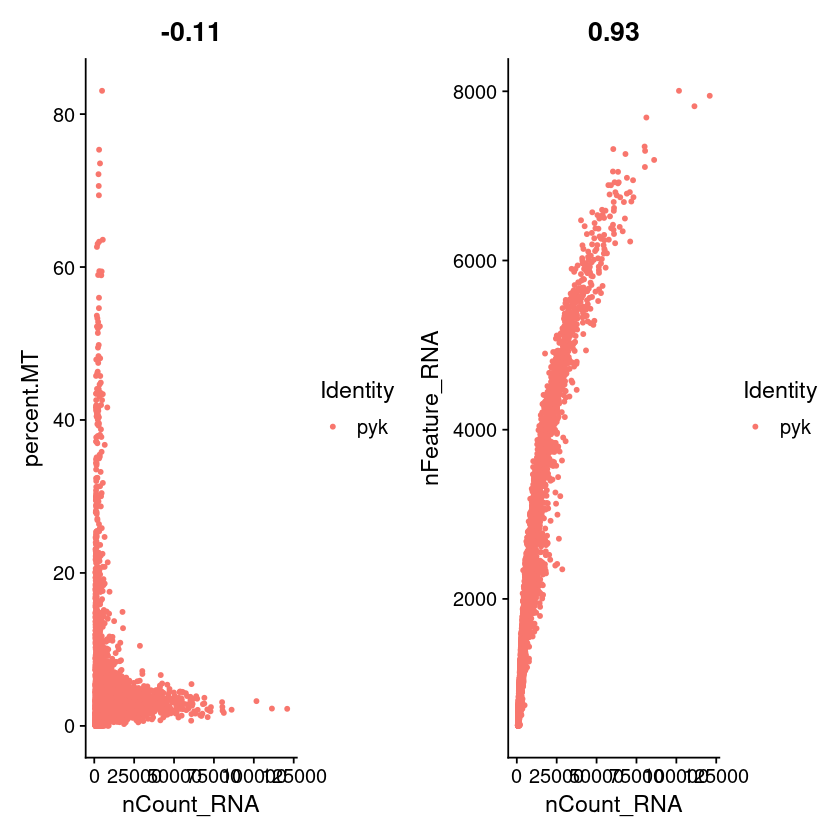

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 17303 anchors

Filtering anchors

	Retained 8755 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



An object of class Seurat 
18517 features across 15421 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA

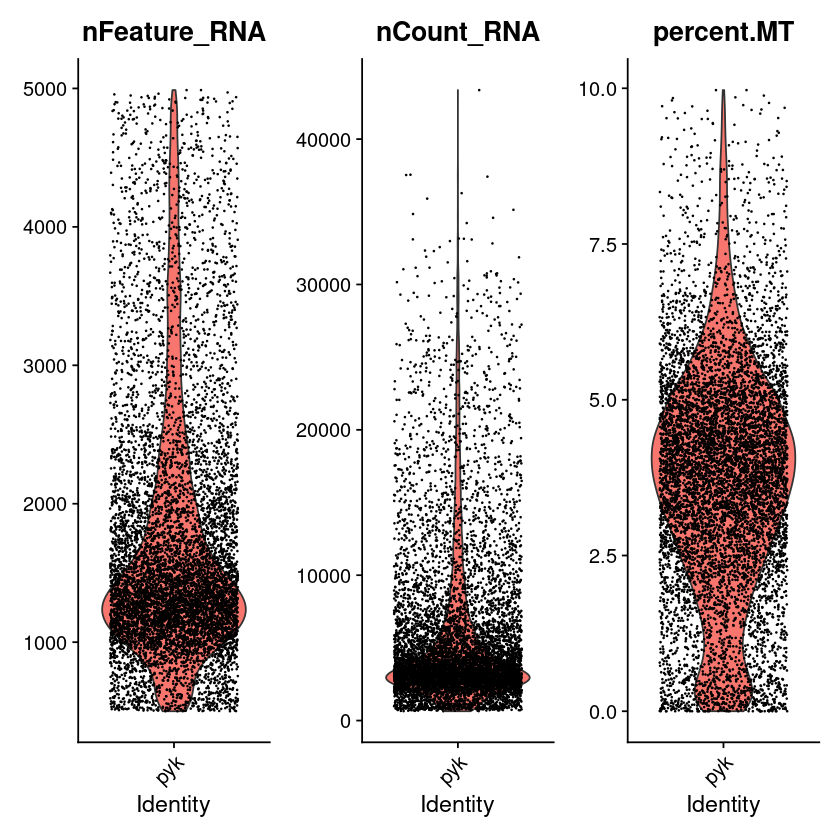

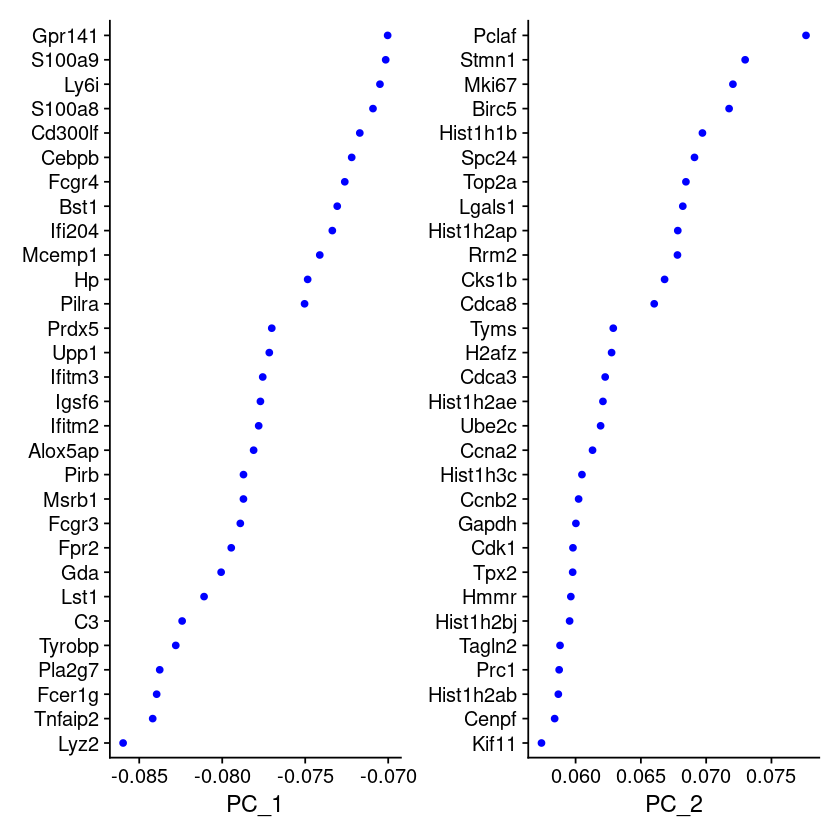

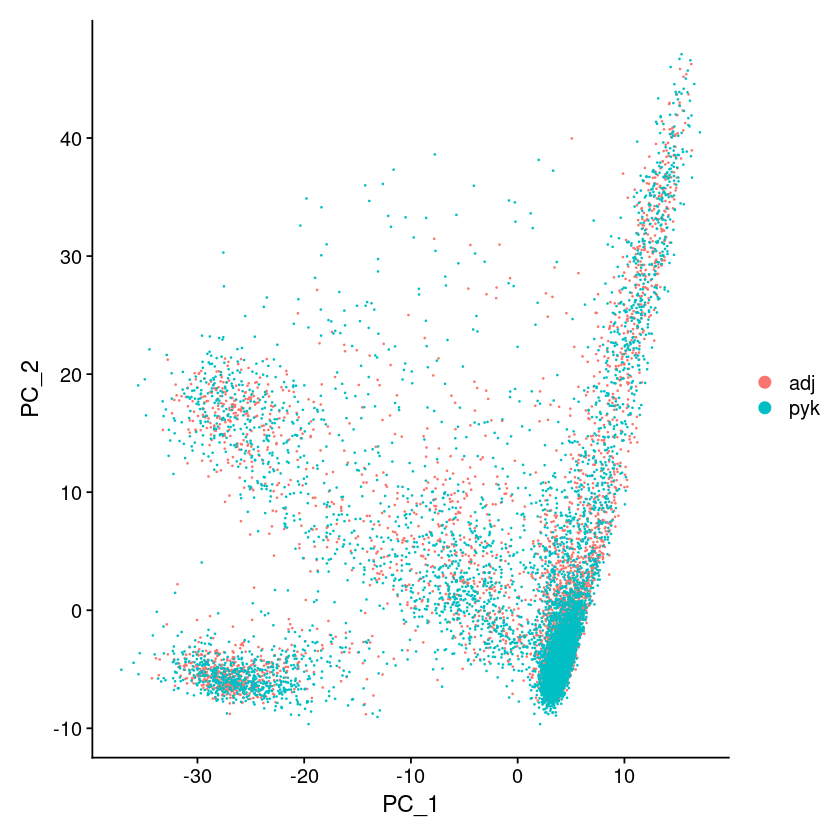

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
07:42:08 UMAP embedding parameters a = 0.9922 b = 1.112

07:42:08 Read 15421 rows and found 20 numeric columns

07:42:08 Using Annoy for neighbor search, n_neighbors = 30

07:42:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:42:10 Writing NN index file to temp file /tmp/Rtmpan2Joo/file2a33aa8358

07:42:10 Searching Annoy index using 1 thread, search_k = 3000

07:42:14 Annoy recall = 100%

07:42:15 Commencing smooth kNN distance calibration using 1 thread

07:42:17 Initializing from

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15421
Number of edges: 558334

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9210
Number of communities: 20
Elapsed time: 3 seconds


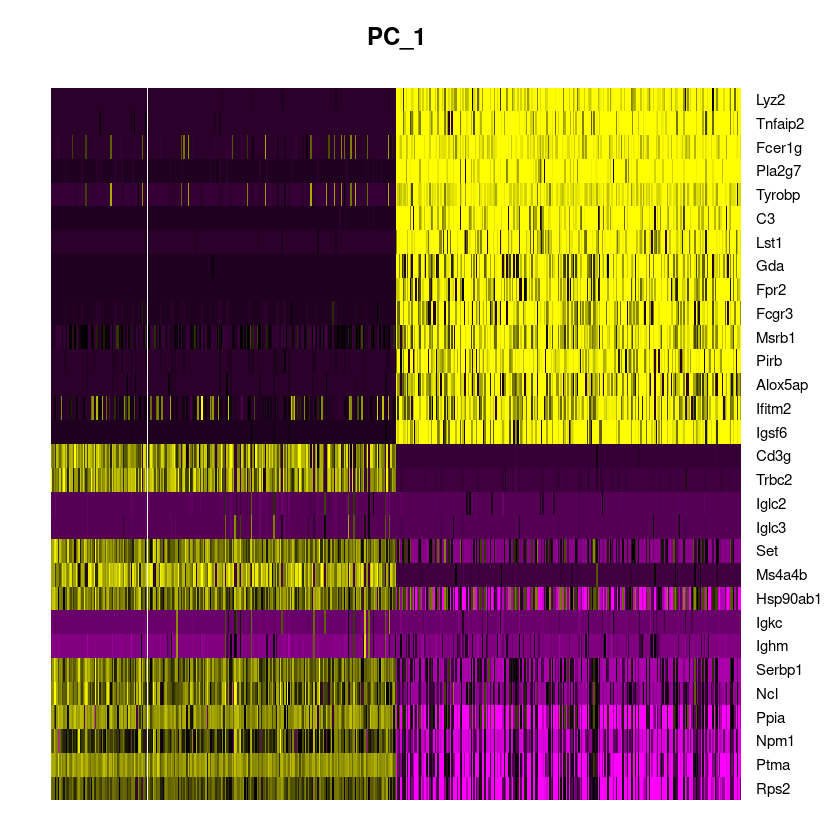

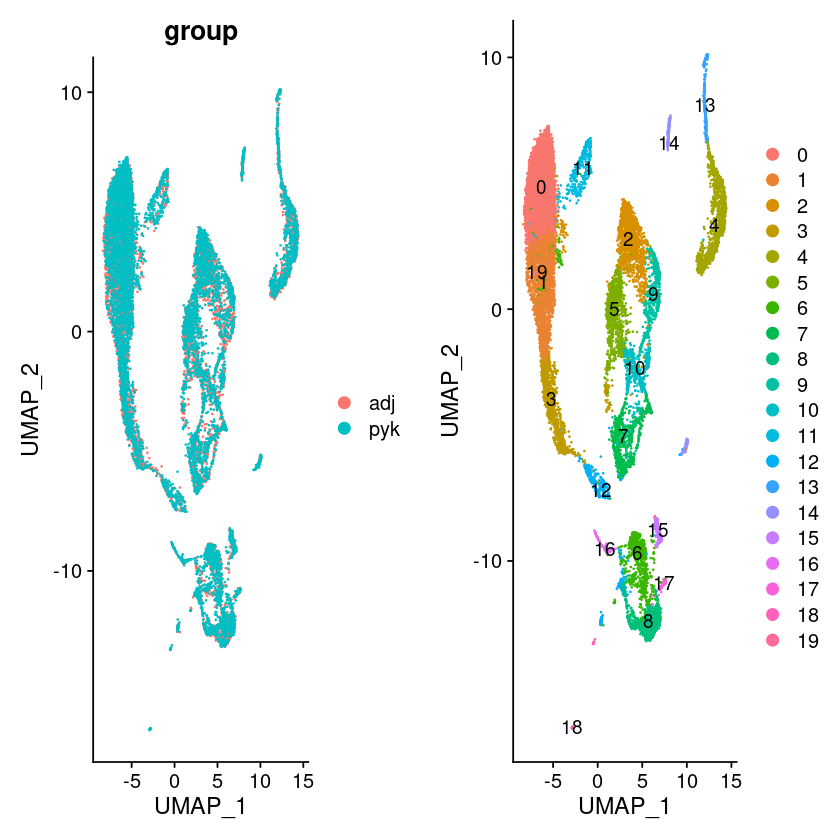

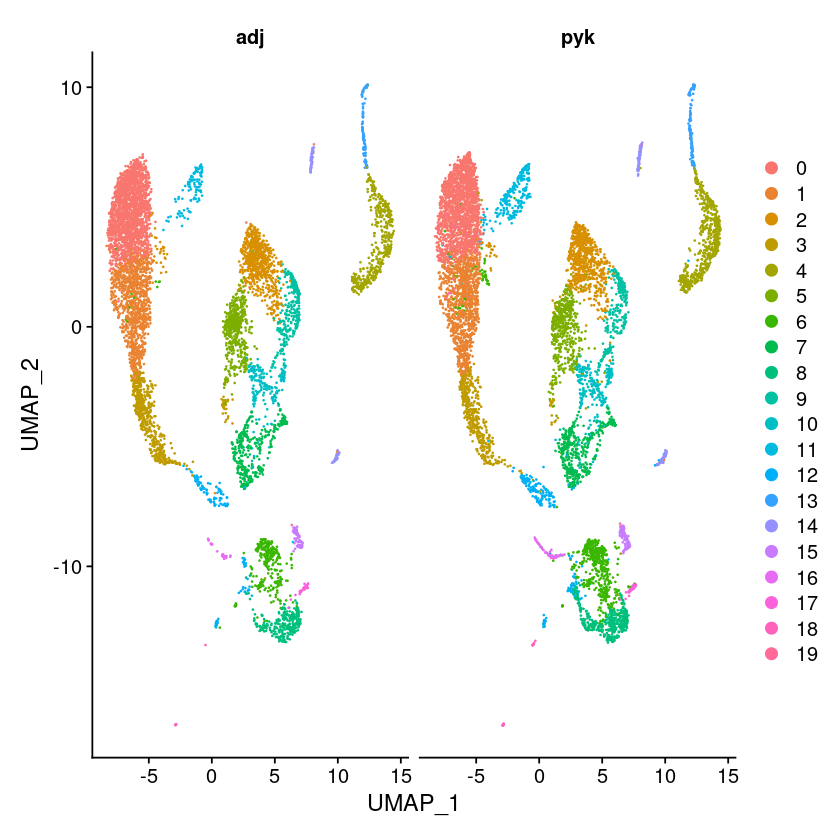

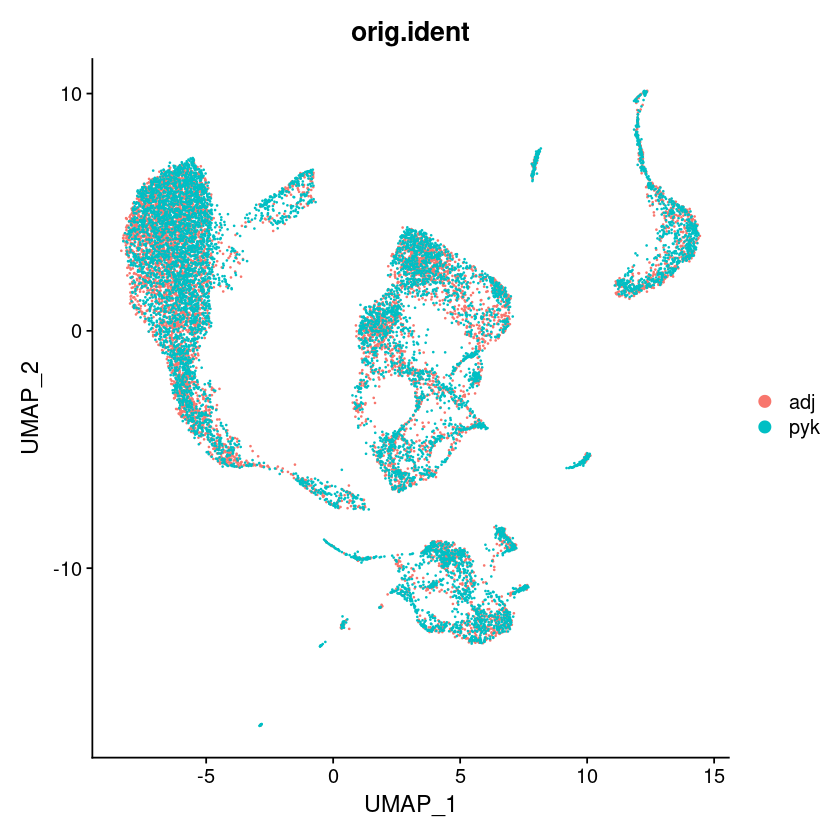

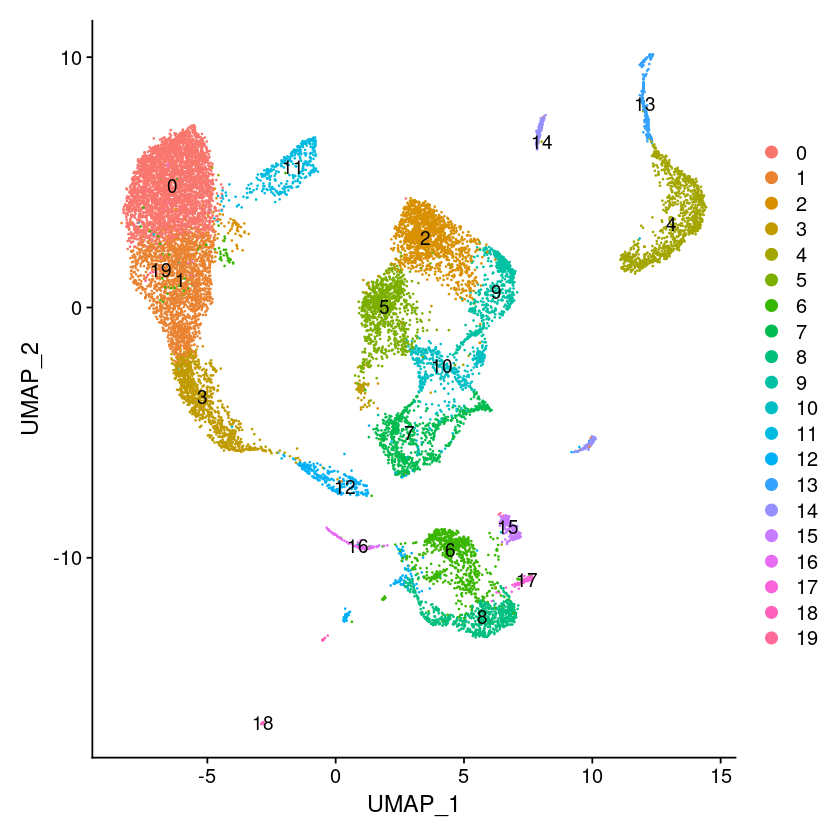

In [5]:
# toc: Table of counts (filtered). Just those columns of \code{tod} that contain cells.
# tod: Table of droplets (raw).  A matrix with columns being each droplet and rows each gene.

#REMOVE BACKGROUND IN adj
adj_toc = Read10X(data.dir ="../outs_cellranger6/adj/outs/filtered_feature_bc_matrix")
adj_tod = Read10X(data.dir ="../outs_cellranger6/adj/outs/raw_feature_bc_matrix")
adj_sc = SoupChannel(adj_tod, adj_toc)
adj_sc = SoupChannel(adj_tod, adj_toc, calcSoupProfile = FALSE)
adj_sc = estimateSoup(adj_sc)
adj_metadata <-read.csv(file ="../outs_cellranger6/adj/outs/analysis/clustering/graphclust/clusters.csv")
adj_sc = setClusters(adj_sc, setNames(adj_metadata$Cluster, rownames(adj_metadata)))
# Estimate rho
adj_sc = autoEstCont(adj_sc)
# Clean the data
adj_out = adjustCounts(adj_sc)

#REMOVE BACKGROUND IN pyk
pyk_toc = Read10X(data.dir ="../outs_cellranger6/pyk/outs/filtered_feature_bc_matrix")
pyk_tod = Read10X(data.dir ="../outs_cellranger6/pyk/outs/raw_feature_bc_matrix")
pyk_sc = SoupChannel(pyk_tod, pyk_toc)
pyk_sc = SoupChannel(pyk_tod, pyk_toc, calcSoupProfile = FALSE)
pyk_sc = estimateSoup(pyk_sc)
pyk_metadata <-read.csv(file ="../outs_cellranger6/pyk/outs/analysis/clustering/graphclust/clusters.csv")
pyk_sc = setClusters(pyk_sc, setNames(pyk_metadata$Cluster, rownames(pyk_metadata)))
# Estimate rho
pyk_sc = autoEstCont(pyk_sc)
# Clean the data
pyk_out = adjustCounts(pyk_sc)

# Set up adj object
adj <- CreateSeuratObject(counts = adj_out, project = "adj", min.cells = 5)
adj$group <- "adj"
adj <- subset(adj, subset = nFeature_RNA > 500)
adj <- NormalizeData(adj, verbose = FALSE)
adj <- FindVariableFeatures(adj, selection.method = "vst", nfeatures = 2000)
## Hang added##
## Remove Gm42418 (rRNA gene) and AY036118 (long non-coding RNA) from adj
counts.adj <- GetAssayData(adj, assay = "RNA")
counts.adj <- counts.adj[-(which(rownames(counts.adj) %in% c("Gm42418", "AY036118"))),]
adj <- subset(adj, features = rownames(counts.adj))

# Set up pyk object
pyk <- CreateSeuratObject(counts = pyk_out, project = "pyk", min.cells = 5)
pyk$group <- "pyk"
pyk <- subset(pyk, subset = nFeature_RNA > 500)
pyk <- NormalizeData(pyk, verbose = FALSE)
pyk <- FindVariableFeatures(pyk, selection.method = "vst", nfeatures = 2000)
## Hang added##
## Remove Gm42418 (rRNA gene) and AY036118 (long non-coding RNA) from pyk
counts.pyk <- GetAssayData(pyk, assay = "RNA")
counts.pyk <- counts.pyk[-(which(rownames(counts.pyk) %in% c("Gm42418", "AY036118"))),]
pyk <- subset(pyk, features = rownames(counts.pyk))

# QUALITY CONTROL adj
adj[["percent.MT"]] <- PercentageFeatureSet(adj, pattern = "^mt-")
VlnPlot(adj, features = c("nFeature_RNA", "nCount_RNA", "percent.MT"), ncol = 3)
plot1 <- FeatureScatter(adj, feature1 = "nCount_RNA", feature2 = "percent.MT")
plot2 <- FeatureScatter(adj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2 
adj <- subset(adj, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.MT < 10)
VlnPlot(adj, features = c("nFeature_RNA", "nCount_RNA", "percent.MT"), ncol = 3)

# QUALITY CONTROL pyk
pyk[["percent.MT"]] <- PercentageFeatureSet(pyk, pattern = "^mt-")
VlnPlot(pyk, features = c("nFeature_RNA", "nCount_RNA", "percent.MT"), ncol = 3)
plot3 <- FeatureScatter(pyk, feature1 = "nCount_RNA", feature2 = "percent.MT")
plot4 <- FeatureScatter(pyk, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot3 + plot4 
pyk <- subset(pyk, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.MT < 10)
VlnPlot(pyk, features = c("nFeature_RNA", "nCount_RNA", "percent.MT"), ncol = 3)

# Perform Integration-------------------------------------------------------------------------------------
pbmc.anchors <- FindIntegrationAnchors(object.list = list(adj, pyk), dims = 1:20)
pbmc <- IntegrateData(anchorset = pbmc.anchors, dims = 1:20)
DefaultAssay(pbmc) <- "integrated"
pbmc
#'''

# Run the standard workflow for visualization and clustering-----------------------------------------------
pbmc <- ScaleData(pbmc, verbose = FALSE)
pbmc <- RunPCA(pbmc, npcs = 30, verbose = FALSE)
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")
DimPlot(pbmc, reduction = "pca")
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

# t-SNE and Clustering
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)

# Visualization------------------------------------------------------------------------------------------
p1 <- DimPlot(pbmc, reduction = "umap", group.by = "group")
p2 <- DimPlot(pbmc, reduction = "umap", label = TRUE)
plot_grid(p1, p2)


#UMAP------------------------------------------------------------------------------------------------
DimPlot(pbmc, reduction = "umap", split.by = "orig.ident", label = FALSE)
DimPlot(pbmc, reduction = "umap", group.by = "orig.ident")
DimPlot(pbmc, reduction = "umap", label = TRUE)

In [6]:
#SAVE
saveRDS(combine, file = "../results_rds/pca_integrated_jupyter.rds")
#### Let try up to here first###
###Hang modified 20211114###
###########################################################################################
###########################################################################################